Riva Poudel

DSP 310

Midterm 

Due: 03.29.2021


In [ ]:
# preamble to be able to run notebooks in Colab
from google.colab import drive
import sys

# mount the drive
drive.mount('/content/drive') 

# useful folders
notes_home = "/content/drive/Shared drives/CSC310/ds/notes/"
user_home = "/content/drive/My Drive/"
    
# insert the notes folder into the path so we can include assets modules etc
sys.path.insert(1,notes_home) 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from assets.confint import classification_confint

In [ ]:

# get data
df = pd.read_csv("/content/drive/Shared drives/CSC310/credit_predict.csv")
df.head(n=5)

,Income,Limit,Cards,Age,Education,Gender_Val,Rating_Label
0,14.891,3606,2,34,11,0,poor
1,106.025,6645,3,82,15,1,poor
2,104.593,7075,4,71,11,0,poor
3,148.924,9504,3,36,11,1,fair
4,55.882,4897,2,68,16,0,poor


In [ ]:
#New Data Set Without Gender Value and Rating_Label Columns
df_new = df.drop(['Gender_Val','Rating_Label'], axis=1)
df_new.describe()

,Income,Limit,Cards,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,2.957500,55.667500,13.450000
std,35.244273,2308.198848,1.371275,17.249807,3.125207
min,10.354000,855.000000,1.000000,23.000000,5.000000
25%,21.007250,3088.000000,2.000000,41.750000,11.000000
50%,33.115500,4622.500000,3.000000,56.000000,14.000000
75%,57.470750,5872.750000,4.000000,70.000000,16.000000
max,186.634000,13913.000000,9.000000,98.000000,20.000000


## **PART II:**

1. There are 7 independent variables in this data set.

2. Descriptive Statistics
  - Income 
    - Min: 10.35
    - Max: 186.63
    - Mean: 45.21
  - Limit
    - Min: 855
    - Max: 13913
    - Mean: 4735.6
  - Cards
    - Min: 1
    - Max: 9
    - Mean: 3
  - Age
    - Min: 23
    - Max: 98
    - Mean: 55.6
  - Education
    - Min: 5
    - Max: 20
    - Mean: 13.45
  - Gender Value
    - Inconclusive, the numbers represent the the gender of the individual in the data set.
  - Rating Label
    - Inconclusive, the data is a description and cannot be computed. 


3. Determining whether the variables are Multi-Modal


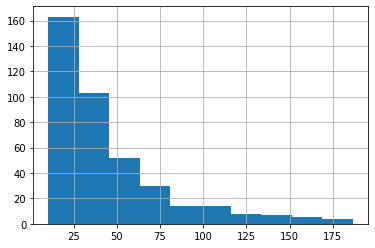

In [ ]:
# Histogram of Income
df_new['Income'].hist()


Income is a **Unimodal** because the data is clustered together at one point. 

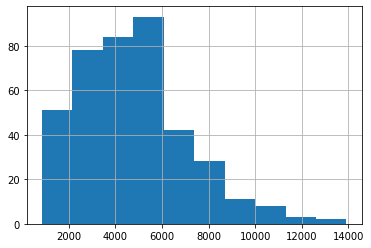

In [ ]:
#Histogram of Limit
df_new['Limit'].hist()

Limit is also **Unimodal** because the data is clustered at one point

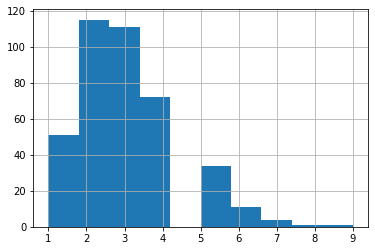

In [ ]:
#Histogram of Cards
df_new['Cards'].hist()

Cards are **Bimodal** because there are points on the historgram that the data peaks at. 

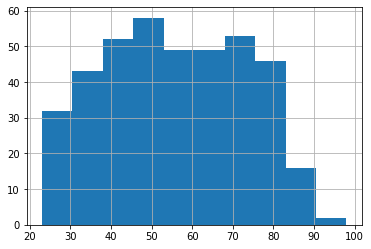

In [ ]:
#Histogram of Age
df_new['Age'].hist()

Age is clearly **Uniform** because it remains roughly the same throughout the graph. 

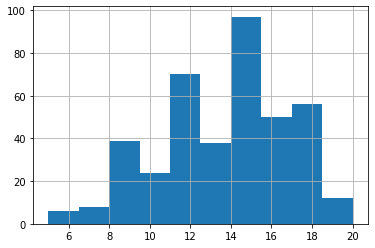

In [ ]:
#Histogram of Education
df_new['Education'].hist()

Education is **Mulitmodal** because there are multiple 'peaks' or clusters of data at multiple points. 

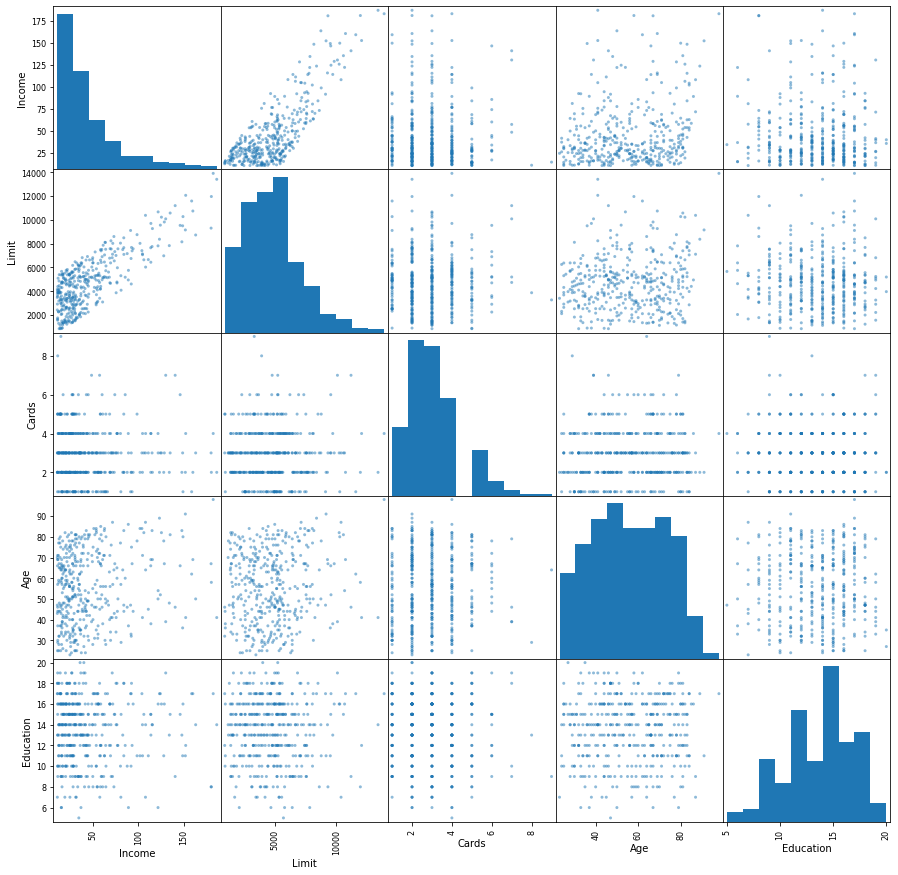

In [ ]:
#Scatter Plot of all Variables
scatter_plot = pd.plotting.scatter_matrix(df_new, figsize=[15,15])


4. Income and Limit have a strong positive correlation. The scatter plot shows that the higher the income of the individual in the data file, the higher their limit is set. What is additionally interesting about the data set, is that Income and Limit are the only two variables that have a correlation. The following two scatter plots, Age and Education, and Limit and Cards, are an example of other correlations between the variables (or lack thereof). The majority of the variables have no clear pattern or relation. In comparison, the scatter plot of Limit and Income have a cluster at the bottom of the graph. The conclusion is that the higher the income of the indiviual, the higher the limit is set. The data is clustered at the bottom of the graph, because the majority of the individuals have a lower income, thus a lower limit. 

Income and Limit Scatter Plot


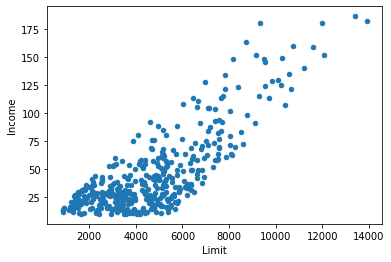

In [ ]:
print('Income and Limit Scatter Plot')
df_new.plot.scatter(x='Limit', y= 'Income')

5. There are 3 units that are computable in the dependent variable. The number of years, amount of money, and number of cards. There are two additional dependent variables that are not computable. (0,1) is meant to signify gender, and (fair, poorly) which is the rating of the individuals credit. 
6. The data set is balenced. This is because the individual variables in the data set satisfy the order of ten and the minimum's and maximum's are around the same magnitude. 